In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline
pd.set_option('display.max_row', 1000)
pd.set_option('display.max_columns', 50)

### Read in the data and perform basic cleaning

In [64]:
# import the augmented June 2016 trip data

df = pd.read_csv('/Users/mgiangreco/Documents/taxi_analysis/data/green_06_2016_augmented.csv')

In [3]:
df.drop(df.columns[0], axis=1, inplace=True) # because first column is not relevant

df['pickup_time'] =  pd.to_datetime(df['pickup_time']) # needs to be in datetime format

df['pickup_hour'] = df.pickup_time.dt.hour

df['dropoff_time'] =  pd.to_datetime(df['dropoff_time'])

df.set_index(['pickup_time'], drop=False, inplace=True)

In [4]:
df.head()

,vendorid,pickup_time,dropoff_time,store_and_fwd_flag,ratecodeid,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,pickup_latlong,dropoff_latlong,trip_time_in_secs,type,pickup_borough,pickup_nbhd,dropoff_borough,dropoff_nbhd,pickup_hour
pickup_time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-06-01 02:46:38,2,2016-06-01 02:46:38,2016-06-01 03:06:40,N,1,-73.930580,40.695179,-74.000053,40.729046,1,5.24,19.5,0.5,0.5,6.24,0.0,NaN,0.3,27.04,1,"(-73.931, 40.695)","(-74.0, 40.729)",1202,yellow,Brooklyn,Bushwick,Manhattan,Greenwich Village,2
2016-06-01 02:55:26,2,2016-06-01 02:55:26,2016-06-01 03:06:52,N,1,-73.946930,40.792553,-73.951569,40.825161,1,3.14,11.5,0.5,0.5,2.56,0.0,NaN,0.3,15.36,1,"(-73.947, 40.793)","(-73.952, 40.825)",686,yellow,Manhattan,East Harlem,Manhattan,Harlem,2
2016-06-01 02:50:36,2,2016-06-01 02:50:36,2016-06-01 03:08:39,N,1,-73.944534,40.823956,-73.994659,40.750423,1,7.50,23.5,0.5,0.5,2.00,0.0,NaN,0.3,26.80,1,"(-73.945, 40.824)","(-73.995, 40.75)",1083,yellow,Manhattan,Harlem,Manhattan,Chelsea,2
2016-06-01 02:57:04,2,2016-06-01 02:57:04,2016-06-01 03:07:52,N,1,-73.952209,40.823872,-73.914360,40.814697,1,2.27,10.5,0.5,0.5,0.00,0.0,NaN,0.3,11.80,2,"(-73.952, 40.824)","(-73.914, 40.815)",648,yellow,Manhattan,Harlem,Bronx,Longwood,2
2016-06-01 02:52:03,2,2016-06-01 02:52:03,2016-06-01 03:08:12,N,1,-73.957977,40.717827,-73.954018,40.655121,3,4.90,16.5,0.5,0.5,0.00,0.0,NaN,0.3,17.80,1,"(-73.958, 40.718)","(-73.954, 40.655)",969,yellow,Brooklyn,Williamsburg,Brooklyn,Flatbush,2


In [5]:
len(df)

1404726

In [6]:
# list unique boroughs--note that some trips have no recorded pickup borough

df.pickup_borough.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Bronx', 'Staten Island', nan],
      dtype=object)

In [7]:
# list all the Manhattan neighborhoods--seems correct

df[df['pickup_borough']=='Manhattan'].pickup_nbhd.unique()

array(['East Harlem', 'Harlem', 'Central Park', 'Inwood',
       'Washington Heights', 'Morningside Heights', 'Upper East Side',
       'Upper West Side', 'Marble Hill', 'Roosevelt Island',
       "Randall's Island", 'Lower East Side', 'Chinatown', 'Kips Bay',
       'West Village', "Hell's Kitchen", 'Midtown', 'Financial District',
       'Gramercy', 'Murray Hill', 'East Village', 'Chelsea',
       'Civic Center'], dtype=object)

In [8]:
len(df[df['pickup_borough'].notnull()])

1400922

In [9]:
# check for obvious outliers in trip time--max trip time is ~24 hrs, which is unlikely

df['trip_time_in_secs'].describe()

count    1.404726e+06
mean     1.411817e+03
std      6.864588e+03
min      0.000000e+00
25%      3.770000e+02
50%      6.360000e+02
75%      1.058000e+03
max      8.639900e+04
Name: trip_time_in_secs, dtype: float64

In [10]:
# check for obvious outliers in trip distance--max trip dist is 268 mi, which is unlikely

df['trip_distance'].describe()

count    1.404726e+06
mean     2.879364e+00
std      2.990728e+00
min      0.000000e+00
25%      1.070000e+00
50%      1.900000e+00
75%      3.600000e+00
max      2.681900e+02
Name: trip_distance, dtype: float64

In [11]:
# check for obvious outliers in passenger count--some trips have no passengers

df['passenger_count'].describe()

count    1.404726e+06
mean     1.358612e+00
std      1.026833e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      9.000000e+00
Name: passenger_count, dtype: float64

In [12]:
# remove all trips > 2 hrs, trips with null pickup or dropoff boroughs, 
# trips longer than 50 mi, and trips with no passengers

trips_df = df[(df['trip_time_in_secs']<=7200) & (df['dropoff_borough'].notnull()) \
              & (df['pickup_borough'].notnull()) & (df['trip_distance']<=50) \
             & (df['passenger_count']>0)]

len(trips_df)


1382173

In [13]:
# Create some handy filters

astoria_pickups = trips_df['pickup_nbhd'] == "Astoria"
astoria_dropoffs = trips_df['dropoff_nbhd'] == "Astoria"
ues_pickups = trips_df['pickup_nbhd'] == "Upper East Side"
ues_dropoffs = trips_df['dropoff_nbhd'] == "Upper East Side"
manhattan_pickups = trips_df['pickup_borough'] == "Manhattan"
manhattan_dropoffs = trips_df['dropoff_borough'] == "Manhattan"


In [14]:
# number of trips starting in Astoria

len(trips_df[astoria_pickups])

70389

In [15]:
# number of trips starting in UES--a lot fewer than start in Astoria

len(trips_df[ues_pickups]) 

6651

### Plot and explore cleaned dataset

In [16]:
trips_df['trip_count'] = 1

trips_df['passenger_miles'] = trips_df['passenger_count'] * trips_df['trip_distance']

/Users/mgiangreco/.virtualenvs/taxi/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/mgiangreco/.virtualenvs/taxi/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


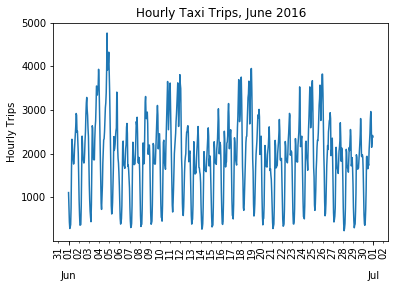

In [17]:
# Scatter plot of hourly trips

trips_df_hourly_trips = trips_df.groupby(pd.Grouper(freq='H', 
                                 closed='left', 
                                 label='left'))['trip_count'].sum()

days = mdates.DayLocator()
months = mdates.MonthLocator()
daysFmt = mdates.DateFormatter('%d') 
monthsFmt = mdates.DateFormatter('\n\n%b')  
dts = trips_df_hourly_trips.index.to_pydatetime()
trips = trips_df_hourly_trips.iloc[:].tolist()

fig = plt.figure(); ax = fig.add_subplot(111)
ax.plot(dts, trips)
ax.xaxis.set_minor_locator(days)
ax.xaxis.set_minor_formatter(daysFmt)
plt.setp(ax.xaxis.get_minorticklabels(), rotation=90)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)

plt.ylabel('Hourly Trips')
plt.title('Hourly Taxi Trips, June 2016');

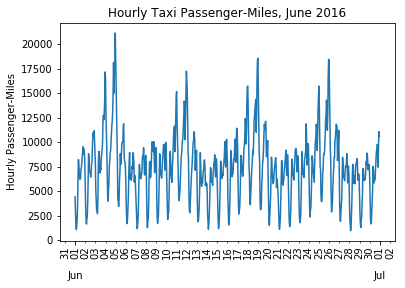

In [18]:
# Scatter plot of hourly passenger-miles

trips_df_hourly_passengermiles = trips_df.groupby(pd.Grouper(freq='H', 
                                 closed='left', 
                                 label='left'))['passenger_miles'].sum()

days = mdates.DayLocator()
months = mdates.MonthLocator()
daysFmt = mdates.DateFormatter('%d') 
monthsFmt = mdates.DateFormatter('\n\n%b')  
dts = trips_df_hourly_passengermiles.index.to_pydatetime()
trips = trips_df_hourly_passengermiles.iloc[:].tolist()

fig = plt.figure(); ax = fig.add_subplot(111)
ax.plot(dts, trips)
ax.xaxis.set_minor_locator(days)
ax.xaxis.set_minor_formatter(daysFmt)
plt.setp(ax.xaxis.get_minorticklabels(), rotation=90)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)

plt.ylabel('Hourly Passenger-Miles')
plt.title('Hourly Taxi Passenger-Miles, June 2016');

In [56]:
metric = 'passenger_miles'
#metric = 'trip_count'

In [57]:
astoria_to_astoria_resampled = trips_df[astoria_pickups & astoria_dropoffs]\
    .groupby(pd.TimeGrouper('5Min'))[metric].sum()

astoria_to_astoria = astoria_to_astoria_resampled\
    .groupby([astoria_to_astoria_resampled.index.hour.rename('hour'), 
    astoria_to_astoria_resampled.index.minute.rename('min')])\
    .sum().groupby('hour').mean().to_frame().stack().reset_index()\
    .rename(columns={0: 'astoria_to_astoria'})

astoria_to_astoria = astoria_to_astoria[['hour', 'astoria_to_astoria']]

astoria_to_astoria.head()

/Users/mgiangreco/.virtualenvs/taxi/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """Entry point for launching an IPython kernel.


,hour,astoria_to_astoria
0,0,135.706667
1,1,106.385000
2,2,73.935000
3,3,49.204167
4,4,37.524167


In [58]:
astoria_to_manhattan_resampled = trips_df[astoria_pickups & manhattan_dropoffs]\
    .groupby(pd.TimeGrouper('5Min'))[metric].sum()

astoria_to_manhattan = astoria_to_manhattan_resampled\
    .groupby([astoria_to_manhattan_resampled.index.hour.rename('hour'), 
    astoria_to_manhattan_resampled.index.minute.rename('min')])\
    .sum().groupby('hour').mean().to_frame().stack().reset_index()\
    .rename(columns={0: 'astoria_to_manhattan'})

astoria_to_manhattan = astoria_to_manhattan[['hour', 'astoria_to_manhattan']]

astoria_to_manhattan.head()

/Users/mgiangreco/.virtualenvs/taxi/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """Entry point for launching an IPython kernel.


,hour,astoria_to_manhattan
0,0,237.272500
1,1,178.800000
2,2,159.110000
3,3,107.467500
4,4,88.769167


In [59]:
manhattan_to_astoria_resampled = trips_df[manhattan_pickups & astoria_dropoffs]\
    .groupby(pd.TimeGrouper('5Min'))[metric].sum()

manhattan_to_astoria = manhattan_to_astoria_resampled\
    .groupby([manhattan_to_astoria_resampled.index.hour.rename('hour'), 
    manhattan_to_astoria_resampled.index.minute.rename('min')])\
    .sum().groupby('hour').mean().to_frame().stack().reset_index()\
    .rename(columns={0: 'manhattan_to_astoria'})

manhattan_to_astoria = manhattan_to_astoria[['hour', 'manhattan_to_astoria']]

manhattan_to_astoria.head()

/Users/mgiangreco/.virtualenvs/taxi/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """Entry point for launching an IPython kernel.


,hour,manhattan_to_astoria
0,0,25.791667
1,1,20.315833
2,2,21.693333
3,3,8.822500
4,4,8.950833


In [60]:
ues_to_ues_resampled = trips_df[ues_pickups & ues_dropoffs]\
    .groupby(pd.TimeGrouper('5Min'))[metric].sum()

ues_to_ues = ues_to_ues_resampled\
    .groupby([ues_to_ues_resampled.index.hour.rename('hour'), 
    ues_to_ues_resampled.index.minute.rename('min')])\
    .sum().groupby('hour').mean().to_frame().stack().reset_index()\
    .rename(columns={0: 'ues_to_ues'})

ues_to_ues = ues_to_ues[['hour', 'ues_to_ues']]

ues_to_ues.head()

/Users/mgiangreco/.virtualenvs/taxi/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """Entry point for launching an IPython kernel.


,hour,ues_to_ues
0,0,0.853333
1,1,0.860833
2,2,0.257500
3,3,0.230000
4,4,0.230833


In [61]:
ues_to_manhattan_resampled = trips_df[ues_pickups & manhattan_dropoffs]\
    .groupby(pd.TimeGrouper('5Min'))[metric].sum()

ues_to_manhattan = ues_to_manhattan_resampled\
    .groupby([ues_to_manhattan_resampled.index.hour.rename('hour'), 
    ues_to_manhattan_resampled.index.minute.rename('min')])\
    .sum().groupby('hour').mean().to_frame().stack().reset_index()\
    .rename(columns={0: 'ues_to_manhattan'})

ues_to_manhattan = ues_to_manhattan[['hour', 'ues_to_manhattan']]

ues_to_manhattan.head()

/Users/mgiangreco/.virtualenvs/taxi/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """Entry point for launching an IPython kernel.


,hour,ues_to_manhattan
0,0,23.455833
1,1,6.609167
2,2,3.539167
3,3,3.116667
4,4,2.905833


In [62]:
dfs = [astoria_to_astoria, astoria_to_manhattan, manhattan_to_astoria, 
       ues_to_ues, ues_to_manhattan]

avg_passenger_miles_per_5_min_interval = reduce(lambda left,right: pd.merge(left,right, on='hour'), dfs)

avg_passenger_miles_per_5_min_interval.head()

,hour,astoria_to_astoria,astoria_to_manhattan,manhattan_to_astoria,ues_to_ues,ues_to_manhattan
0,0,135.706667,237.272500,25.791667,0.853333,23.455833
1,1,106.385000,178.800000,20.315833,0.860833,6.609167
2,2,73.935000,159.110000,21.693333,0.257500,3.539167
3,3,49.204167,107.467500,8.822500,0.230000,3.116667
4,4,37.524167,88.769167,8.950833,0.230833,2.905833


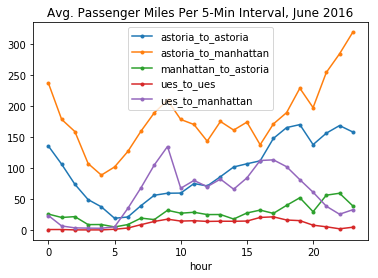

In [67]:
title = 'Avg. Passenger Miles Per 5-Min Interval, June 2016'

avg_passenger_miles_per_5_min_interval.plot(x='hour', title=title, style='.-');